In [95]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as scipy
from scipy.interpolate import interp1d


# Optimization and Root Finding

## Example: Maximum Likelihood Estimation (MLE)

Recall that in MLE, we are interested in estimating the value of a parameter $\theta$ that maximizes a log-likelihood function $\ell(X;\theta)$.  Let $X_1,...,X_n$ be an iid set of random variables with pdf $f(x;\theta)$, where $\theta \in \mathbb{R}^k$ is a parameter.  The likelihood function is:



$$L(X;\theta) = \prod_{i=1}^n f(X_i;\theta)$$


We want the value of $\theta$ that maximizes $L$.  We can accomplish this by taking the first derivative (or gradient) of $L$ with respect to $\theta$, setting it to zero and solving for $\theta$.  However, this is more easily accomplished if we first take $\log(L)$, as $L$ is a product of densities, and taking the log of a product yields a sum.  Because $log$ is a monotonically increasing function, any value of $\theta$ that maximizes $\log(L)$ also maximizes $L$.

$$
\begin{eqnarray*}
\ell(X;\theta) &=& \log(L(X;\theta)) \\\\
&=& \log\left(\prod_{i=1}^n f(X_i;\theta)\right)\\\\
&=&\sum_{i=1}^n \log(f(X_i;\theta)
\end{eqnarray*}
$$

Optimization then amounts to finding the zeros of

$$
\begin{eqnarray*}
\frac{\partial\ell}{\partial \theta} &=& \frac{\partial}{\partial \theta} \left(\sum_{i=1}^n\log(f(X_i;\theta)\right)\\\\
&=& \sum_{i=1}^n \frac{\partial\log(f(X_i;\theta)}{\partial \theta}
\end{eqnarray*}
$$

## Optimization in one dimension usually  means finding roots of the derivative.

The MLE problem above is one circumstance where optimization (in the case of one parameter - single variable optimization) is required. Mostly, we will be interested in multivariate optimization. We begin with the single variable case to develop the main ideas.

## Main Issues in Root Finding in One Dimension

* Separating close roots
* Numerical Stability
* Rate of Convergence
* Continuity and Differentiability

## Bisection Method

The bisection method is one of the simplest methods for finding zeroes of a non-linear function.  It is guaranteed to find a root - but it can be slow. The main idea comes from the intermediate value theorem:  If $f(a)$ and $f(b)$ have different signs and $f$ is continous, then $f$ must have a zero between $a$ and $b$.  We evaluate the function at the midpoint, $c = \frac12(a+b)$. $f(c)$ is either zero, has the same sign as $f(a)$ or the same sign as $f(b)$.  Suppose $f(c)$ has the same sign as $f(a)$ (as pictured below).  We then repeat the process on the interval $[c,b]$.   

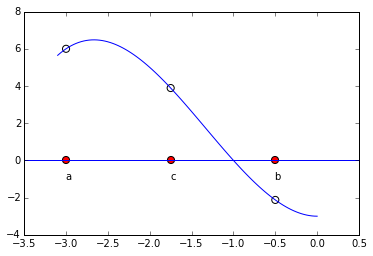

In [3]:
def f(x):
    return x**3 + 4*x**2 -3

x = np.linspace(-3.1, 0, 100)
plt.plot(x, x**3 + 4*x**2 -3)

a = -3.0
b = -0.5
c = 0.5*(a+b)

plt.text(a,-1,"a")
plt.text(b,-1,"b")
plt.text(c,-1,"c")

plt.scatter([a,b,c], [f(a), f(b),f(c)], s=50, facecolors='none')
plt.scatter([a,b,c], [0,0,0], s=50, c='red')

xaxis = plt.axhline(0);

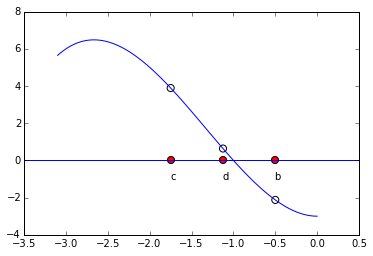

In [4]:

x = np.linspace(-3.1, 0, 100)
plt.plot(x, x**3 + 4*x**2 -3)

d = 0.5*(b+c)

plt.text(d,-1,"d")
plt.text(b,-1,"b")
plt.text(c,-1,"c")

plt.scatter([d,b,c], [f(d), f(b),f(c)], s=50, facecolors='none')
plt.scatter([d,b,c], [0,0,0], s=50, c='red')

xaxis = plt.axhline(0);

We can terminate the process whenever the function evaluated at the new midpoint is 'close enough' to zero. This method is an example of what are known as 'bracketed methods'. This means the root is 'bracketed' by the end-points (it is somewhere in between). Another class of methods are 'open methods' - the root need not be somewhere in between the end-points (but it usually needs to be close!)

## Secant Method

The secant method also begins with two initial points, but without the constraint that the function values are of opposite signs.  We use the secant line to extrapolate the next candidate point.

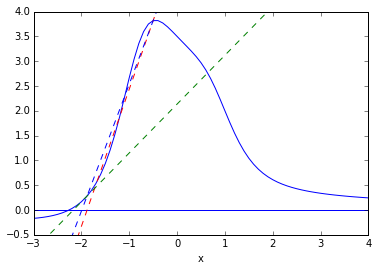

In [5]:
def f(x):
    return (x**3-2*x+7)/(x**4+2)

x = np.arange(-3,5, 0.1);
y = f(x)

p1=plt.plot(x, y)
plt.xlim(-3, 4)
plt.ylim(-.5, 4)
plt.xlabel('x')
plt.axhline(0)
t = np.arange(-10, 5., 0.1)

x0=-1.2
x1=-0.5
xvals = []
xvals.append(x0)
xvals.append(x1)
notconverge = 1
count = 0
cols=['r--','b--','g--','y--']
while (notconverge==1 and count <  3):
    slope=(f(xvals[count+1])-f(xvals[count]))/(xvals[count+1]-xvals[count])
    intercept=-slope*xvals[count+1]+f(xvals[count+1])
    plt.plot(t, slope*t + intercept, cols[count])
    nextval = -intercept/slope
    if abs(f(nextval)) < 0.001:
        notconverge=0
    else:
        xvals.append(nextval)
    count = count+1

plt.show()

The secant method has the advantage of fast convergence.  While the bisection method has a linear convergence rate (i.e. error goes to zero at the rate that $h(x) = x$ goes to zero, the secant method has a convergence rate that is faster than linear, but not quite quadratic (i.e. $\sim x^\alpha$, where $\alpha = \frac{1+\sqrt{5}}2 \approx 1.6$)

## Newton-Rhapson Method

We want to find the value $\theta$ so that some (differentiable) function $g(\theta)=0$. 
Idea: start with a guess, $\theta_0$.  Let $\tilde{\theta}$ denote the value of $\theta$ for which $g(\theta) = 0$ and define $h = \tilde{\theta} - \theta_0$.  Then:

$$
\begin{eqnarray*}
g(\tilde{\theta}) &=& 0 \\\\
&=&g(\theta_0 + h) \\\\
&\approx& g(\theta_0) + hg'(\theta_0)
\end{eqnarray*}
$$

This implies that 

$$ h\approx \frac{g(\theta_0)}{g'(\theta_0)}$$

So that

$$\tilde{\theta}\approx \theta_0 - \frac{g(\theta_0)}{g'(\theta_0)}$$

Thus, we set our next approximation:

$$\theta_1 = \theta_0 - \frac{g(\theta_0)}{g'(\theta_0)}$$

and we have developed an interative procedure with:

$$\theta_n = \theta_{n-1} - \frac{g(\theta_{n-1})}{g'(\theta_{n-1})}$$

#### Example:

Let $$g(x) = \frac{x^3-2x+7}{x^4+2}$$


The graph of this function is:

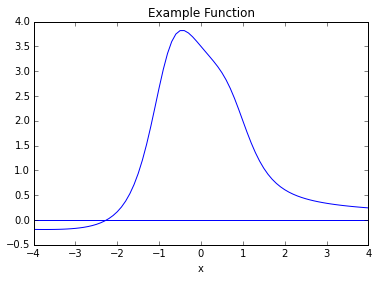

In [6]:
x = np.arange(-5,5, 0.1);
y = (x**3-2*x+7)/(x**4+2)

p1=plt.plot(x, y)
plt.xlim(-4, 4)
plt.ylim(-.5, 4)
plt.xlabel('x')
plt.axhline(0)
plt.title('Example Function')
plt.show()

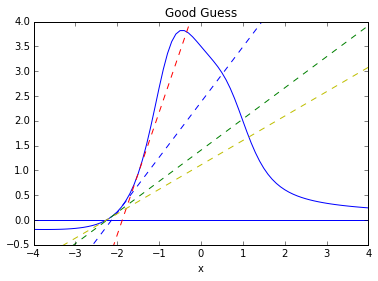

In [7]:

x = np.arange(-5,5, 0.1);
y = (x**3-2*x+7)/(x**4+2)

p1=plt.plot(x, y)
plt.xlim(-4, 4)
plt.ylim(-.5, 4)
plt.xlabel('x')
plt.axhline(0)
plt.title('Good Guess')
t = np.arange(-5, 5., 0.1)

x0=-1.5
xvals = []
xvals.append(x0)
notconverge = 1
count = 0
cols=['r--','b--','g--','y--','c--','m--','k--','w--']
while (notconverge==1 and count <  6):
    funval=(xvals[count]**3-2*xvals[count]+7)/(xvals[count]**4+2)
    slope=-((4*xvals[count]**3 *(7 - 2 *xvals[count] + xvals[count]**3))/(2 + xvals[count]**4)**2) + (-2 + 3 *xvals[count]**2)/(2 + xvals[count]**4)
   
    intercept=-slope*xvals[count]+(xvals[count]**3-2*xvals[count]+7)/(xvals[count]**4+2)

    plt.plot(t, slope*t + intercept, cols[count])
    nextval = -intercept/slope
    if abs(funval) < 0.01:
        notconverge=0
    else:
        xvals.append(nextval)
    count = count+1

plt.show()



From the graph, we see the zero is near -2.  We make an initial guess of $$x=-1.5$$

We have made an excellent choice for our first guess, and we can see rapid convergence!

In [8]:
funval

0.007591996330867034

In fact, the Newton-Rhapson method converges quadratically.  However, NR (and the secant method) have a fatal flaw:

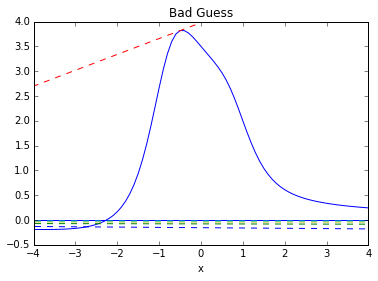

In [9]:

x = np.arange(-5,5, 0.1);
y = (x**3-2*x+7)/(x**4+2)

p1=plt.plot(x, y)
plt.xlim(-4, 4)
plt.ylim(-.5, 4)
plt.xlabel('x')
plt.axhline(0)
plt.title('Bad Guess')
t = np.arange(-5, 5., 0.1)

x0=-0.5
xvals = []
xvals.append(x0)
notconverge = 1
count = 0
cols=['r--','b--','g--','y--','c--','m--','k--','w--']
while (notconverge==1 and count <  6):
    funval=(xvals[count]**3-2*xvals[count]+7)/(xvals[count]**4+2)
    slope=-((4*xvals[count]**3 *(7 - 2 *xvals[count] + xvals[count]**3))/(2 + xvals[count]**4)**2) + (-2 + 3 *xvals[count]**2)/(2 + xvals[count]**4)
   
    intercept=-slope*xvals[count]+(xvals[count]**3-2*xvals[count]+7)/(xvals[count]**4+2)

    plt.plot(t, slope*t + intercept, cols[count])
    nextval = -intercept/slope
    if abs(funval) < 0.01:
        notconverge = 0
    else:
        xvals.append(nextval)
    count = count+1

plt.show()


We have stumbled on the horizontal asymptote.  The algorithm fails to converge. 

### Basins of Attraction Can Be 'Close'

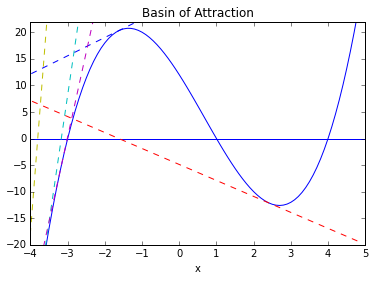

-3.1713324128480282

In [54]:
def f(x):
    return x**3 - 2*x**2 - 11*x +12
def s(x):
    return 3*x**2 - 4*x - 11

x = np.arange(-5,5, 0.1);

p1=plt.plot(x, f(x))
plt.xlim(-4, 5)
plt.ylim(-20, 22)
plt.xlabel('x')
plt.axhline(0)
plt.title('Basin of Attraction')
t = np.arange(-5, 5., 0.1)

x0=2.43
xvals = []
xvals.append(x0)
notconverge = 1
count = 0
cols=['r--','b--','g--','y--','c--','m--','k--','w--']
while (notconverge==1 and count <  6):
    funval = f(xvals[count])
    slope = s(xvals[count])
   
    intercept=-slope*xvals[count]+funval

    plt.plot(t, slope*t + intercept, cols[count])
    nextval = -intercept/slope
    if abs(funval) < 0.01:
        notconverge = 0
    else:
        xvals.append(nextval)
    count = count+1

plt.show()
xvals[count-1]

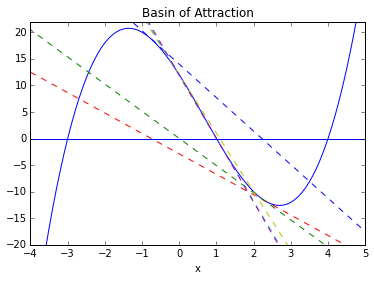

0.9991912395651094

In [59]:
p1=plt.plot(x, f(x))
plt.xlim(-4, 5)
plt.ylim(-20, 22)
plt.xlabel('x')
plt.axhline(0)
plt.title('Basin of Attraction')
t = np.arange(-5, 5., 0.1)

x0=2.349
xvals = []
xvals.append(x0)
notconverge = 1
count = 0
cols=['r--','b--','g--','y--','c--','m--','k--','w--']
while (notconverge==1 and count <  6):
    funval = f(xvals[count])
    slope = s(xvals[count])
   
    intercept=-slope*xvals[count]+funval

    plt.plot(t, slope*t + intercept, cols[count])
    nextval = -intercept/slope
    if abs(funval) < 0.01:
        notconverge = 0
    else:
        xvals.append(nextval)
    count = count+1

plt.show()
xvals[count-1]

### Convergence Rate


The following is a derivation of the convergence rate of the NR method:


Suppose $x_k \; \rightarrow \; x^*$ and $g'(x^*) \neq 0$.  Then we may write:

$$x_k = x^* + \epsilon_k$$.

Now expand $g$ at $x^*$:

$$g(x_k) = g(x^*) + g'(x^*)\epsilon_k + \frac12 g''(x^*)\epsilon_k^2 + ...$$
$$g'(x_k)=g'(x^*) + g''(x^*)\epsilon_k$$

We have that


\begin{eqnarray}
\epsilon_{k+1} &=& \epsilon_k + \left(x_{k-1}-x_k\right)\\
&=& \epsilon_k -\frac{g(x_k)}{g'(x_k)}\\
&\approx & \frac{g'(x^*)\epsilon_k + \frac12g''(x^*)\epsilon_k^2}{g'(x^*)+g''(x^*)\epsilon_k}\\
&\approx & \frac{g''(x^*)}{2g'(x^*)}\epsilon_k^2
\end{eqnarray}

## Gauss-Newton

For 1D, the Newton method is
$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
$$

We can generalize to $k$ dimensions by 
$$
x_{n+1} = x_n - J^{-1} f(x_n)
$$
where $x$ and $f(x)$ are now vectors, and $J^{-1}$ is the inverse Jacobian matrix. In general, the Jacobian is not a square matrix, and we use the generalized inverse $(J^TJ)^{-1}J^T$ instead, giving
$$
x_{n+1} = x_n - (J^TJ)^{-1}J^T f(x_n)
$$

In multivariate nonlinear estimation problems, we can find the vector of parameters $\beta$ by minimizing the residuals $r(\beta)$, 
$$
\beta_{n+1} = \beta_n - (J^TJ)^{-1}J^T r(\beta_n)
$$
where the entries of the Jacobian matrix $J$ are
$$
J_{ij} = \frac{\partial r_i(\beta)}{\partial \beta_j}
$$

## Inverse Quadratic Interpolation

Inverse quadratic interpolation is a type of polynomial interpolation.  Polynomial interpolation simply means we find the polynomial of least degree that fits a set of points.  In quadratic interpolation, we use three points, and find the quadratic polynomial that passes through those three points.  



[-1.18481848 -1.18481848]


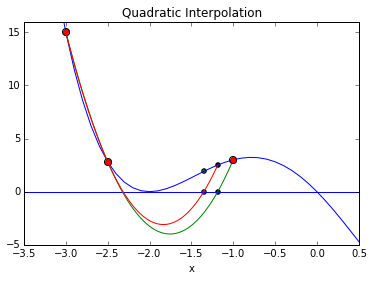

In [94]:

def f(x):
    return (x - 2) * x * (x + 2)**2


x = np.arange(-5,5, 0.1);
plt.plot(x, f(x))
plt.xlim(-3.5, 0.5)
plt.ylim(-5, 16)
plt.xlabel('x')
plt.axhline(0)
plt.title("Quadratic Interpolation")

#First Interpolation
x0=np.array([-3,-2.5,-1.0])
y0=f(x0)
f2 = interp1d(x0, y0,kind='quadratic')

#Plot parabola
xs = np.linspace(-3, -1, num=10000, endpoint=True)
plt.plot(xs, f2(xs))

#Plot first triplet
plt.plot(x0, f(x0),'ro');
plt.scatter(x0, f(x0), s=50, c='yellow');

#New x value
xnew=xs[np.where(abs(f2(xs))==min(abs(f2(xs))))]

plt.scatter(np.append(xnew,xnew), np.append(0,f(xnew)), c='black');

#New triplet
x1=np.append([-3,-2.5],xnew)
y1=f(x1)
f2 = interp1d(x1, y1,kind='quadratic')

#New Parabola
xs = np.linspace(min(x1), max(x1), num=100, endpoint=True)
plt.plot(xs, f2(xs))

xnew=xs[np.where(abs(f2(xs))==min(abs(f2(xs))))]
plt.scatter(np.append(xnew,xnew), np.append(0,f(xnew)), c='green');


So that's the idea behind quadratic interpolation. Use a quadratic approximation, find the zero of interest, use that as a new point for the next quadratic approximation.


Inverse quadratic interpolation means we do quadratic interpolation on the *inverse function*.  So, if we are looking for a root of $f$, we approximate $f^{-1}(x)$ using quadratic interpolation. Note that the secant method can be viewed as a *linear* interpolation on the inverse of $f$. We can write:

$$f^{-1}(y) = \frac{(y-f(x_n))(y-f(x_{n-1}))}{(f(x_{n-2})-f(x_{n-1}))(f(x_{n-2})-f(x_{n}))}x_{n-2} + \frac{(y-f(x_n))(y-f(x_{n-2}))}{(f(x_{n-1})-f(x_{n-2}))(f(x_{n-1})-f(x_{n}))}x_{n-1} + \frac{(y-f(x_{n-2}))(y-f(x_{n-1}))}{(f(x_{n})-f(x_{n-2}))(f(x_{n})-f(x_{n-1}))}x_{n-1}$$

We use the above formula to find the next guess $x_{n+1}$ for a zero of $f$ (so $y=0$):

$$x_{n+1} = \frac{f(x_n)f(x_{n-1})}{(f(x_{n-2})-f(x_{n-1}))(f(x_{n-2})-f(x_{n}))}x_{n-2} + \frac{f(x_n)f(x_{n-2})}{(f(x_{n-1})-f(x_{n-2}))(f(x_{n-1})-f(x_{n}))}x_{n-1} + \frac{f(x_{n-2})f(x_{n-1})}{(f(x_{n})-f(x_{n-2}))(f(x_{n})-f(x_{n-1}))}x_{n}$$

We aren't so much interested in deriving this as we are understanding the procedure:




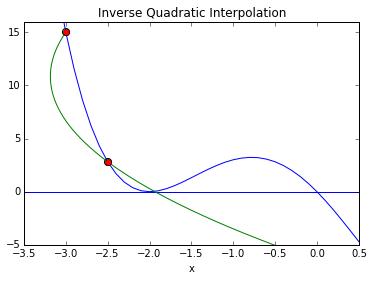

In [120]:
x = np.arange(-5,5, 0.1);
plt.plot(x, f(x))
plt.xlim(-3.5, 0.5)
plt.ylim(-5, 16)
plt.xlabel('x')
plt.axhline(0)
plt.title("Inverse Quadratic Interpolation")

#First Interpolation
x0=np.array([-3,-2.5,1])
y0=f(x0)
f2 = interp1d(y0, x0,kind='quadratic')

#Plot parabola
xs = np.linspace(min(f(x0)), max(f(x0)), num=10000, endpoint=True)
plt.plot(f2(xs), xs)

#Plot first triplet
plt.plot(x0, f(x0),'ro');
plt.scatter(x0, f(x0), s=50, c='yellow');


Convergence rate is approximately $1.8$. The advantage of the inverse method is that we will *always* have a real root (the parabola will always cross the x-axis). A serious disadvantage is that the initial points must be very close to the root or the method may not converge.

That is why it is usually used in conjunction with other methods.


## Brent's Method

Brent's method is a combination of bisection, secant and inverse quadratic interpolation.  Like bisection, it is a 'bracketed' method (starts with points $(a,b)$ such that $f(a)f(b)<0$.   

Roughly speaking, the method begins by using the secant method to obtain a third point $c$, then uses inverse quadratic interpolation to generate the next possible root. Without going into too much detail, the algorithm attempts to assess when interpolation will go awry, and if so, performs a bisection step. Also, it has certain criteria to reject an iterate. If that happens, the next step will be linear interpolation (secant method). 

#### The Brent method is the default method that scypy uses to minimize a univariate function:

In [11]:
from scipy.optimize import minimize_scalar

def f(x):
    return (x - 2) * x * (x + 2)**2

res = minimize_scalar(f)
res.x

1.2807764040333458

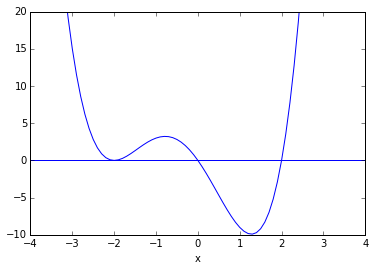

In [12]:
x = np.arange(-5,5, 0.1);
p1=plt.plot(x, f(x))
plt.xlim(-4, 4)
plt.ylim(-10, 20)
plt.xlabel('x')
plt.axhline(0)

To find zeroes, use 


In [13]:
scipy.optimize.brentq(f,-1,.5)

-7.864845203343107e-19

In [14]:
scipy.optimize.brentq(f,.5,3)

2.0

In [15]:
scipy.optimize.newton(f,-3)

-2.0000000172499592